In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import talib as ta

ModuleNotFoundError: No module named 'talib'

In [ ]:
df_prices = pd.read_excel('data/validate.xlsx', usecols="B:Z")

C:\Users\Márton\AppData\Local\Temp\ipykernel_19584\1909927849.py:1: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  df_prices = pd.read_excel('data/validate.xlsx', usecols="B:Z")


In [ ]:
df_days = pd.read_excel('data/validate.xlsx', usecols="A")
df_days["PRICES"] = df_days["PRICES"].dt.day_of_week
df_days["a"], df_days["b"], df_days["c"], df_days["v"], df_days["w"], df_days["d"], df_days["e"], df_days["f"], df_days["g"], df_days["h"], df_days["i"], df_days["j"], df_days["k"], df_days["l"], df_days["m"], df_days["n"], df_days["o"], df_days["p"], df_days["q"], df_days["r"], df_days["s"], df_days["t"], df_days["u"] = [df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"], df_days["PRICES"]]
df_days = df_days.to_numpy().flatten()

In [ ]:
df_week = pd.read_excel('data/validate.xlsx', usecols="A")
df_week["PRICES"] = df_week["PRICES"].dt.isocalendar().week - 1
df_week["a"], df_week["b"], df_week["c"], df_week["v"], df_week["w"], df_week["d"], df_week["e"], df_week["f"], df_week["g"], df_week["h"], df_week["i"], df_week["j"], df_week["k"], df_week["l"], df_week["m"], df_week["n"], df_week["o"], df_week["p"], df_week["q"], df_week["r"], df_week["s"], df_week["t"], df_week["u"] = [df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"], df_week["PRICES"]]
df_week = df_week.to_numpy().flatten()

In [ ]:
df_month = pd.read_excel('data/validate.xlsx', usecols="A")
df_month["PRICES"] = df_month["PRICES"].dt.month - 1
df_month["a"], df_month["b"], df_month["c"], df_month["v"], df_month["w"], df_month["d"], df_month["e"], df_month["f"], df_month["g"], df_month["h"], df_month["i"], df_month["j"], df_month["k"], df_month["l"], df_month["m"], df_month["n"], df_month["o"], df_month["p"], df_month["q"], df_month["r"], df_month["s"], df_month["t"], df_month["u"] = [df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"], df_month["PRICES"]]
df_month = df_month.to_numpy().flatten()

In [ ]:
df_hour = np.arange(24)
df_hour = np.tile(df_hour, df_prices.shape[0])


In [ ]:
df_prices = df_prices.to_numpy().flatten()
len(df_prices)

17520

In [ ]:
observations = pd.DataFrame({
    "prices": df_prices, 
    "hour": df_hour,
    "day": df_days,
    "week": df_week,
    "month" : df_month
})

In [ ]:
np.max(df_week)

52

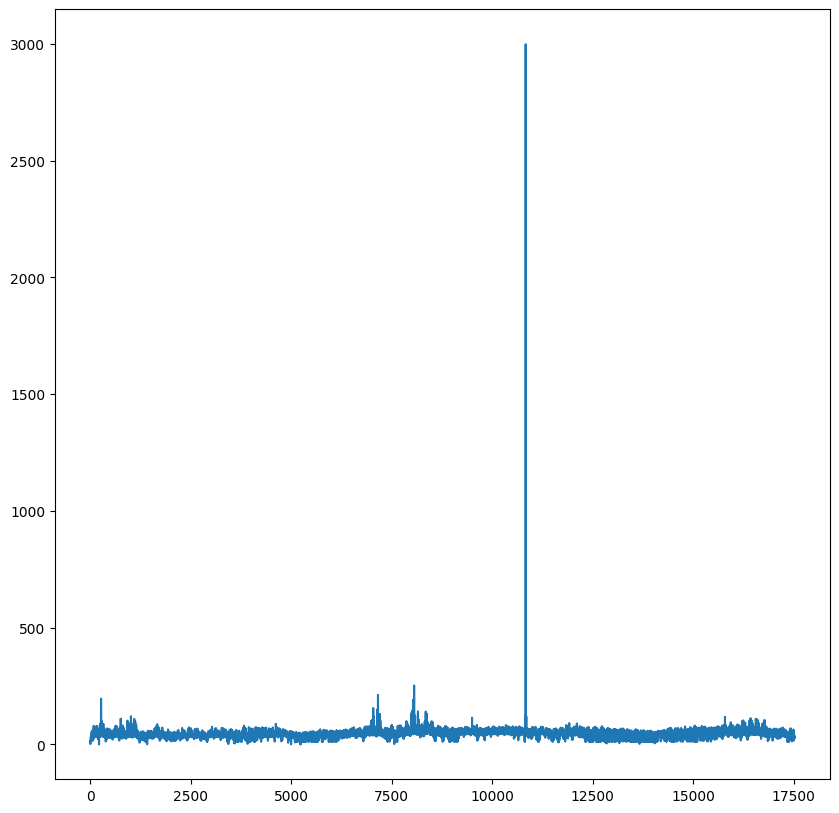

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(df_prices)

In [ ]:
observations['weekend'] = observations['day'].apply(lambda x: 1 if x > 4 else 0)

In [ ]:
n = 6

In [ ]:
observations['rsi'] = 100 - (100 / (1 + observations['prices'].diff(1).mask(observations['prices'].diff(1) < 0, 0).ewm(alpha=1/n, adjust=False).mean() / observations['prices'].diff(1).mask(observations['prices'].diff(1) > 0, -0.0).abs().ewm(alpha=1/n, adjust=False).mean()))
observations['roc'] = (observations['prices'].shift(n) - observations['prices']) / observations['prices'].shift(n) * 100

In [ ]:
observations.to_csv('data/val.csv')
observations.tail(20)

,prices,hour,day,week,month,weekend,rsi,roc
17500,15.90,4,5,51,11,1,15.581368,65.894466
17501,20.00,5,5,51,11,1,27.088423,51.397327
17502,23.68,6,5,51,11,1,36.422559,28.739091
17503,25.04,7,5,51,11,1,39.838190,18.648473
17504,25.48,8,5,51,11,1,41.067379,9.900990
17505,28.67,9,5,51,11,1,49.961816,-16.924959
17506,28.50,10,5,51,11,1,49.484211,-79.245283
17507,30.41,11,5,51,11,1,55.251537,-52.050000
17508,34.67,12,5,51,11,1,65.724852,-46.410473
17509,31.76,13,5,51,11,1,55.145057,-26.837061
